In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')

## 读取并展示数据

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 清洗数据

In [5]:
test_PassengerId = test.PassengerId

train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

## Embarked

有2个NaN，看其分布，填充为最大概率的那个

In [6]:
train[train.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,80.0,B28,NaN
829,1,1,female,62.0,0,0,80.0,B28,NaN


In [7]:
pd.value_counts(train.Embarked)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
train.Embarked.fillna('S', inplace=True)

### 看是否和Survived结果相关

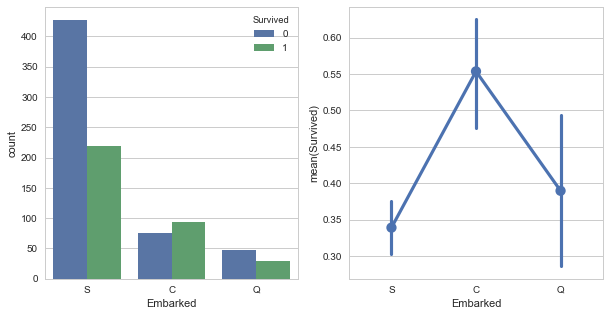

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=train, x='Embarked', hue='Survived', ax=ax1)
sns.pointplot(data=train, x='Embarked', y='Survived', ax=ax2)

In [10]:
train_embarked_dummies = pd.get_dummies(train['Embarked'], prefix='Embarked')
test_embarked_dummies = pd.get_dummies(test['Embarked'], prefix='Embarked')

train = train.join(train_embarked_dummies)
test = test.join(test_embarked_dummies)

train.drop('Embarked', axis=1, inplace=True)
test.drop('Embarked', axis=1, inplace=True)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,NaN,0,0,1
1,1,1,female,38.0,1,0,71.2833,C85,1,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,0,0,1
3,1,1,female,35.0,1,0,53.1000,C123,0,0,1
4,0,3,male,35.0,0,0,8.0500,NaN,0,0,1


## Fare

test中有一个需要填补，否则不能操作，比如类型转换。而且我觉得填补test数据，还是用test本身推导出的值比较好，不要越俎代庖

In [11]:
test.loc[test['Fare'].isnull(), 'Fare'] = test.Fare.mean()

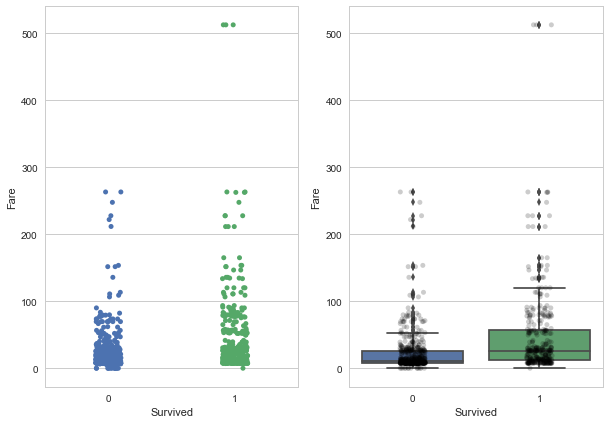

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 7))

sns.stripplot(data=train, x='Survived', y='Fare', jitter=True, ax=ax1)

sns.stripplot(data=train, x='Survived', y='Fare', jitter=True, color='black', alpha=0.2, ax=ax2)
sns.boxplot(data=train, x='Survived', y='Fare', ax=ax2)

上面 这张图，第一张是分布，第二张是统计。已经能看出来Fare和Survived是有关系的了，因为Survived=1的集合均值，范围都会高一些。

额外的，数据集中有几个奇异值，抹平下。

In [13]:
train[train.Fare > 270]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
258,1,1,female,35.0,0,0,512.3292,NaN,1,0,0
679,1,1,male,36.0,0,1,512.3292,B51 B53 B55,1,0,0
737,1,1,male,35.0,0,0,512.3292,B101,1,0,0


In [14]:
train.loc[train.Fare > 270,'Fare'] = 270

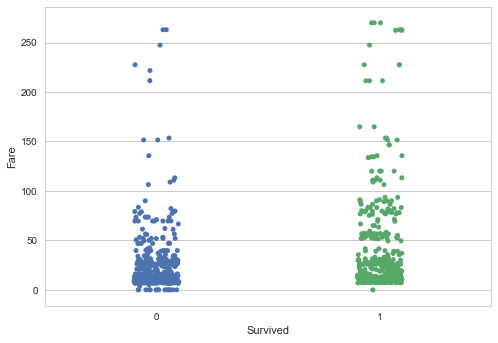

In [15]:
sns.stripplot(data=train, x='Survived', y='Fare', jitter=True)

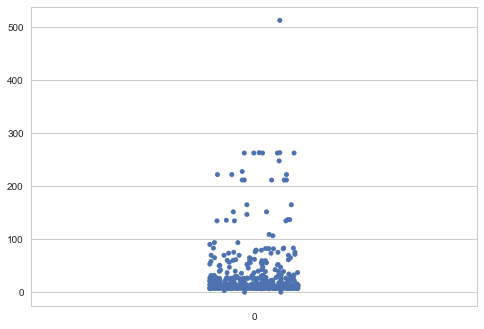

In [16]:
sns.stripplot(data=test.Fare, jitter=True)

In [17]:
test.loc[test.Fare > 270, 'Fare'] = 270

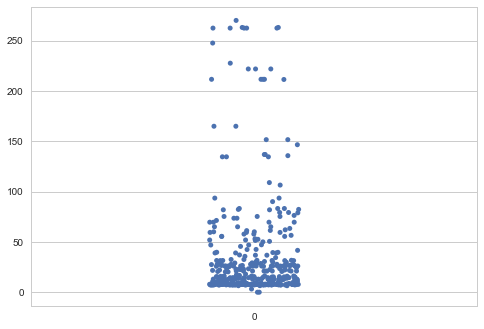

In [18]:
sns.stripplot(data=test.Fare, jitter=True)

## Age

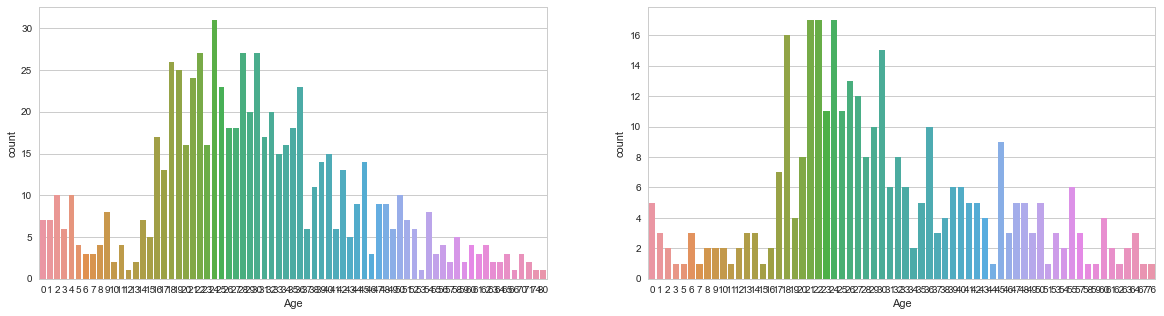

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 5))

sns.countplot(train.Age.dropna().astype(int), ax=ax1)
sns.countplot(test.Age.dropna().astype(int), ax=ax2)

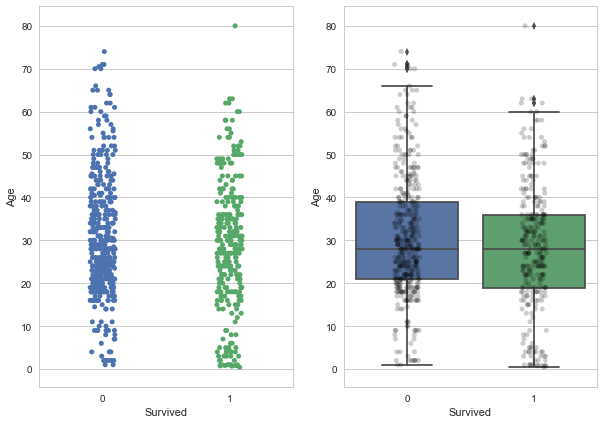

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 7))

sns.stripplot(data=train, x='Survived', y='Age', jitter=True, ax=ax1)

sns.stripplot(data=train, x='Survived', y='Age', jitter=True, color='black', alpha=0.2, ax=ax2)
sns.boxplot(data=train, x='Survived', y='Age', ax=ax2)

In [21]:
train_age_mean = train.Age.mean()
train_age_std = train.Age.std()
train_age_null_num = train.Age.isnull().sum()

test_age_mean = test.Age.mean()
test_age_std = test.Age.std()
test_age_null_num = test.Age.isnull().sum()

查看下刚才结算出的结果

In [22]:
whos

Variable                 Type           Data/Info
-------------------------------------------------
DataFrame                type           <class 'pandas.core.frame.DataFrame'>
Series                   type           <class 'pandas.core.series.Series'>
ax1                      AxesSubplot    Axes(0.125,0.125;0.352273x0.755)
ax2                      AxesSubplot    Axes(0.547727,0.125;0.352273x0.755)
fig                      Figure         Figure(720x504)
np                       module         <module 'numpy' from '/us<...>ages/numpy/__init__.pyc'>
pd                       module         <module 'pandas' from '/u<...>ges/pandas/__init__.pyc'>
plt                      module         <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
sns                      module         <module 'seaborn' from '/<...>es/seaborn/__init__.pyc'>
test                     DataFrame           Pclass     Sex   Age<...>\n[418 rows x 10 columns]
test_PassengerId         Series         0       892\n1       

In [23]:
train_age_rand_arr = np.random.randint(train_age_mean-train_age_std, train_age_mean+train_age_std, train_age_null_num)
test_age_rand_arr = np.random.randint(test_age_mean-test_age_std, test_age_mean+test_age_std, test_age_null_num)

train.loc[train.Age.isnull(), 'Age'] = train_age_rand_arr
test.loc[test.Age.isnull(), 'Age'] = test_age_rand_arr

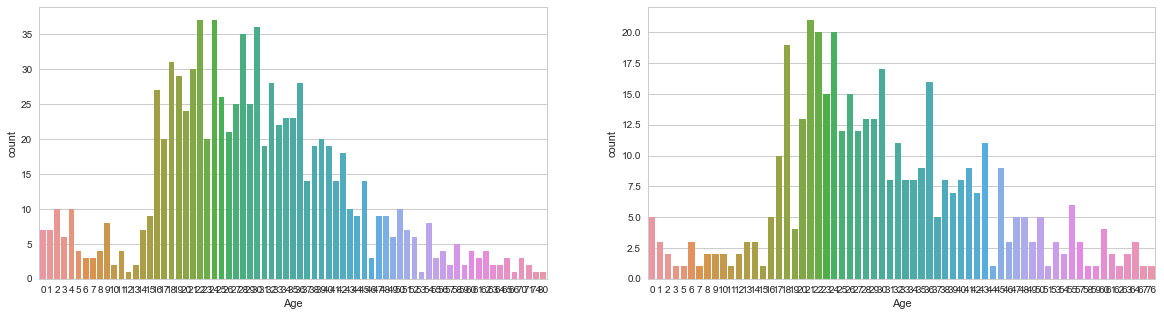

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 5))

sns.countplot(train.Age.astype(int), ax=ax1)
sns.countplot(test.Age.astype(int), ax=ax2)

## Cabin

In [25]:
pd.value_counts(train.Cabin)

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

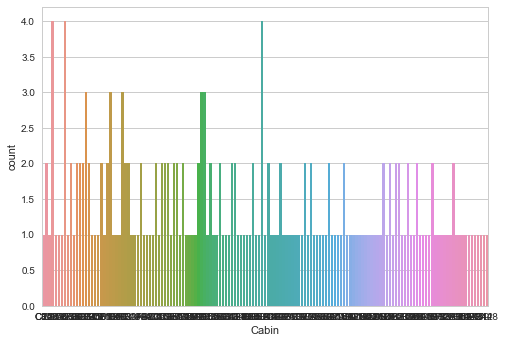

In [26]:
sns.countplot(train.Cabin)

In [27]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

## Family(SibSp & Parch)

In [28]:
pd.value_counts(train.SibSp)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [29]:
pd.value_counts(train.Parch)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

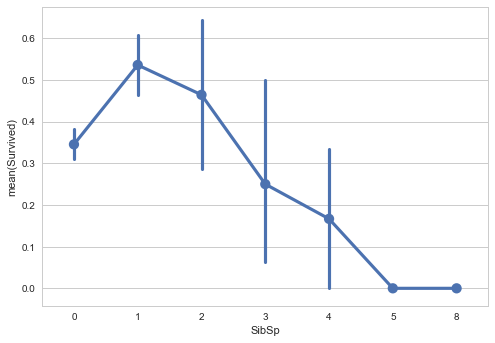

In [30]:
sns.pointplot(data=train, x='SibSp', y='Survived')

train.Family. = train.SibSp + train.Parch
这样写的话不work，没有新建Family列，所以还是写成train['Family']比较好

In [31]:
train['Family'] = train.SibSp + train.Parch
test['Family'] = test.SibSp + test.Parch

train.loc[train['Family'] > 0, 'Family'] = 1
test.loc[test['Family'] > 0, 'Family'] = 1

In [32]:
pd.value_counts(train['Family'] )

0    537
1    354
Name: Family, dtype: int64

In [33]:
train.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test.drop(['SibSp', 'Parch'], axis=1, inplace=True)

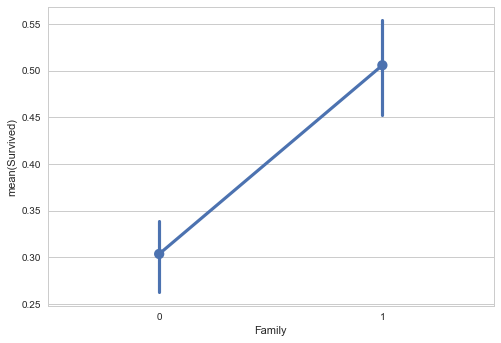

In [34]:
sns.pointplot(data=train, x='Family', y='Survived')

## Sex

In [35]:
pd.value_counts(train.Sex)

male      577
female    314
Name: Sex, dtype: int64

In [36]:
train.loc[train.Age <= 16, 'Sex'] = 'child'

In [37]:
pd.value_counts(train.Sex)

male      514
female    263
child     114
Name: Sex, dtype: int64

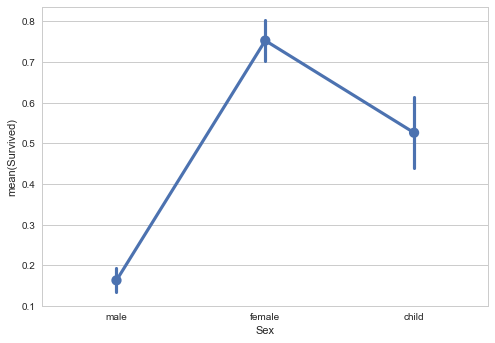

In [38]:
sns.pointplot(data=train, x='Sex', y='Survived')

In [39]:
train_sex_dummies = pd.get_dummies(train.Sex, prefix='Sex')
train = train.join(train_sex_dummies)
train.drop('Sex', axis=1, inplace=True)

test_sex_dummies = pd.get_dummies(test.Sex, prefix='Sex')
test = test.join(test_sex_dummies)
test.drop('Sex', axis=1, inplace=True)

## Pclass

In [40]:
pd.value_counts(train.Pclass)

3    491
1    216
2    184
Name: Pclass, dtype: int64

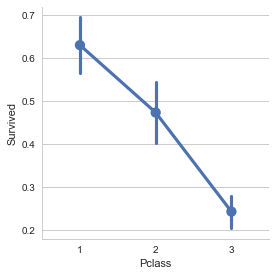

In [41]:
sns.factorplot(data=train, x='Pclass', y='Survived')

In [42]:
train_pclass = pd.get_dummies(train.Pclass, prefix='Pclass')
train= train.join(train_pclass)
train.drop('Pclass', axis=1, inplace=True)

test_pclass = pd.get_dummies(test.Pclass, prefix='Pclass')
test= test.join(test_pclass)
test.drop('Pclass', axis=1, inplace=True)

## 结束清洗数据

In [43]:
train.head()

,Survived,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Family,Sex_child,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,0,0,1,1,0,0,1,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,1,0,1,0,0
2,1,26.0,7.9250,0,0,1,0,0,1,0,0,0,1
3,1,35.0,53.1000,0,0,1,1,0,1,0,1,0,0
4,0,35.0,8.0500,0,0,1,0,0,0,1,0,0,1


In [44]:
test.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Family,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,34.5,7.8292,0,1,0,0,0,1,0,0,1
1,47.0,7.0000,0,0,1,1,1,0,0,0,1
2,62.0,9.6875,0,1,0,0,0,1,0,1,0
3,27.0,8.6625,0,0,1,0,0,1,0,0,1
4,22.0,12.2875,0,0,1,1,1,0,0,0,1


发现test比train少一列，因为get_dummies的时候，test没Child的值，所以补全

In [45]:
test = test.reindex(columns=train.columns, fill_value=0).drop('Survived', axis=1)
test.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Family,Sex_child,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,34.5,7.8292,0,1,0,0,0,0,1,0,0,1
1,47.0,7.0000,0,0,1,1,0,1,0,0,0,1
2,62.0,9.6875,0,1,0,0,0,0,1,0,1,0
3,27.0,8.6625,0,0,1,0,0,0,1,0,0,1
4,22.0,12.2875,0,0,1,1,0,1,0,0,0,1


## 训练&预测

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [47]:
train_x = train.drop('Survived', axis=1)
train_y = train.Survived
test_x = test.copy()

In [48]:
lr = LogisticRegression()
lr.fit(train_x, train_y)
test_y_lr = lr.predict(test_x)
lr.score(train_x, train_y)

0.80359147025813693

In [49]:
lr.coef_

array([[ -2.21791171e-02,  -5.73068101e-04,   4.73297922e-01,
          2.50657189e-01,  -1.93789064e-01,  -9.23181236e-02,
          3.86875734e-01,   1.49387515e+00,  -1.35058484e+00,
          1.21884159e+00,   2.76953175e-01,  -9.65628713e-01]])

In [50]:
svc = SVC()
svc.fit(train_x, train_y)
test_y_svc = svc.predict(test_x)
svc.score(train_x, train_y)

0.877665544332211

In [51]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_x, train_y)
test_y_rf = rf.predict(test_x)
rf.score(train_x, train_y)

0.98653198653198648

In [52]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x, train_y)
test_y_knn = knn.predict(test_x)
knn.score(train_x, train_y)

0.84736251402918072

In [53]:
gaussian = GaussianNB()
gaussian.fit(train_x, train_y)
test_y_gaussian = gaussian.predict(test_x)
gaussian.score(train_x, train_y)

0.76879910213243552

In [54]:
submission = pd.DataFrame({
        "PassengerId": test_PassengerId,
        "Survived": test_y_rf
    })
submission.to_csv('prediction.csv', index=False)